# Assignment

Create code cells below, read in your dataset to accomplish 4 python tasks:

1. Print out the basic statistics of the data. For numeric data, this should include the mean, median, mode, range, standard deviation, and interquartile (25%, 50%, 75%) range. For categorical data, it should include the number of unique values.
2. For each variable, indicate the number of missing values.
3. Choose two variables. Calculate the skew and kurtosis for each of these variables.
4. Choose two variables. Represent one variable in a histogram. In the other, filter it to represent multiple box plots.

Below your statistics, explain what information you can extract about your dataset from the statistics you have calculated.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import kagglehub

path = kagglehub.dataset_download("tobycrabtree/nfl-scores-and-betting-data")

print("Path to dataset files:", path)

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "spreadspoke_scores.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tobycrabtree/nfl-scores-and-betting-data",
  file_path,
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# View the structure and sample data from the dataset
df

Path to dataset files: /root/.cache/kagglehub/datasets/tobycrabtree/nfl-scores-and-betting-data/versions/66


<ipython-input-3-b2270cb76a8b>:12: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14081,1/19/2025,2024,Division,True,Buffalo Bills,27,25,Baltimore Ravens,BAL,-1.5,52,Highmark Stadium,False,19.0,4.0,84.0,snow
14082,1/19/2025,2024,Division,True,Philadelphia Eagles,28,22,Los Angeles Rams,PHI,-7.0,43.5,Lincoln Financial Field,False,34.0,8.0,67.0,snow
14083,1/26/2025,2024,Conference,True,Philadelphia Eagles,55,23,Washington Commanders,PHI,-6.0,47,Lincoln Financial Field,False,40.0,11.0,45.0,NaN
14084,1/26/2025,2024,Conference,True,Kansas City Chiefs,32,29,Buffalo Bills,KC,-1.0,49.5,GEHA Field at Arrowhead Stadium,False,31.0,8.0,45.0,NaN


In [6]:
import pandas as pd
# Get numerical statistics
stats = df.describe()

# Print the mean, median,range (min, max), standard deviation, and interquartile (25%, 50%, 75%) range
print(stats)

# Print the mode
print("\n")
for column in df.select_dtypes(include=['number']):
    print(f"Mode for {column}: {df[column].mode()[0]}")

       schedule_season    score_home    score_away  spread_favorite  \
count     14086.000000  14086.000000  14086.000000     11607.000000   
mean       1997.192390     22.513702     19.839699        -5.360644   
std          16.711931     10.519009     10.141589         3.429628   
min        1966.000000      0.000000      0.000000       -26.500000   
25%        1983.000000     15.000000     13.000000        -7.000000   
50%        1998.000000     22.000000     20.000000        -4.500000   
75%        2012.000000     30.000000     27.000000        -3.000000   
max        2024.000000     72.000000     62.000000         0.000000   

       weather_temperature  weather_wind_mph  weather_humidity  
count         12550.000000      12534.000000       8498.000000  
mean             59.004064          7.561353         67.172276  
std              15.536135          5.729357         15.831903  
min              -6.000000          0.000000          0.000000  
25%              48.000000         

In [7]:
# Print the number missing values
missing_values = df.isnull().sum()
print(missing_values)

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1536
weather_wind_mph        1552
weather_humidity        5588
weather_detail         10934
dtype: int64


In [10]:
# Calculate the skew and kurtosis

var_1 = 'weather_temperature'
var_2 = 'weather_humidity'

skew_1 = df[var_1].skew()
kurtosis_1 = df[var_1].kurtosis()

skew_2 = df[var_2].skew()
kurtosis_2 = df[var_2].kurtosis()

print(f"Skew for {var_1}: {skew_1}")
print(f"Kurtosis for {var_1}: {kurtosis_1}")
print("\n")
print(f"Skew for {var_2}: {skew_2}")
print(f"Kurtosis for {var_2}: {kurtosis_2}")

Skew for weather_temperature: -0.7174900065523904
Kurtosis for weather_temperature: -0.0420765262122238


Skew for weather_humidity: -0.6190284034608707
Kurtosis for weather_humidity: 0.3457488102919415


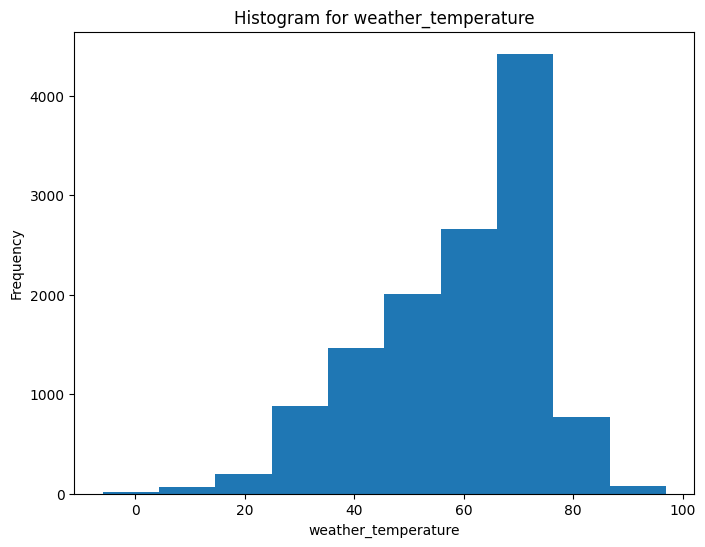

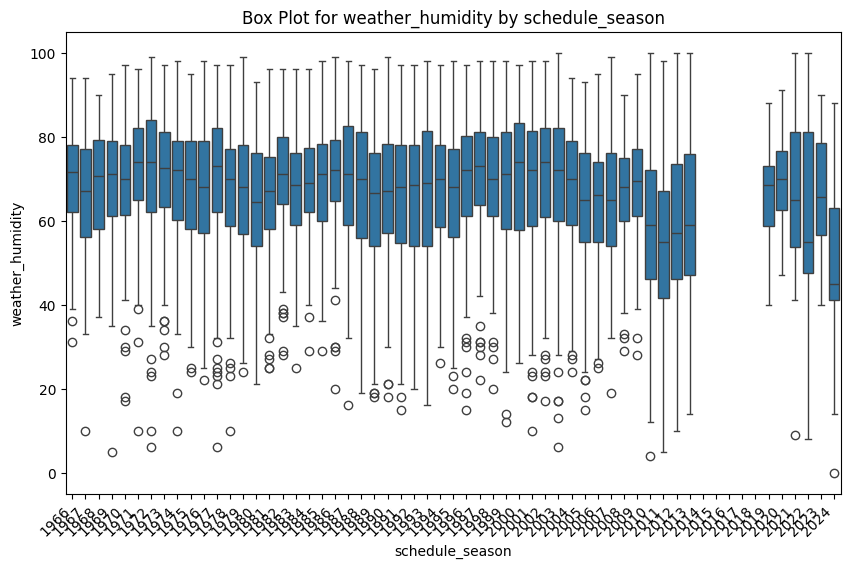

In [12]:
# Print a histogram and boxplots
import matplotlib.pyplot as plt
import seaborn as sns

var_histogram = 'weather_temperature'

var_boxplot = 'weather_humidity'
var_filter = 'schedule_season'

plt.figure(figsize=(8, 6))
plt.hist(df[var_histogram], bins=10)
plt.xlabel(var_histogram)
plt.ylabel("Frequency")
plt.title(f"Histogram for {var_histogram}")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=var_filter, y=var_boxplot, data=df)
plt.xlabel(var_filter)
plt.ylabel(var_boxplot)
plt.title(f"Box Plot for {var_boxplot} by {var_filter}")
plt.xticks(rotation=45, ha='right')
plt.show()

When I look at the mean and interquartile values for score_home and score_away, I conclude that the team scores more points in home games than away games.